In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.datasets import fashion_mnist

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [5]:
len(x_train)

60000

In [6]:
len(x_test)

10000

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
n=2000
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         53,  70,  30,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  83, 223, 220,
        231, 233, 231, 218, 191,  33,   0,   0,   1,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 142, 248, 228, 215,
        217, 219, 219, 220, 235, 234, 107,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   3,   0,  69, 245, 221, 229, 213,
        219, 206, 210, 217, 222, 218, 243,  64,   0,   4,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 231, 224, 230, 222,
        217, 222, 224, 215, 215, 222, 219,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   1,   0,   0, 193, 238, 216, 222, 218, 213,
        211, 208, 210, 217, 224, 217, 222, 169,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [9]:
y_train[n]

4

This is: Trouser


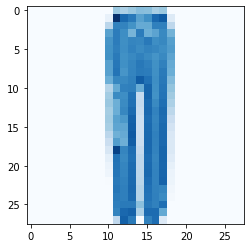

In [10]:
n = 1000
print('This is:', class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Blues');

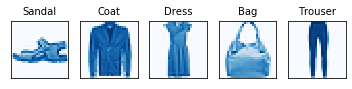

In [11]:
pick = np.random.choice(60000, 5, replace=False)

for i in range(5):
    n = pick[i]
    ax = plt.subplot(151+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=10)
    plt.imshow(x_train[n], cmap='Blues')

In [12]:
x_train.shape

(60000, 28, 28)

In [13]:
x_test.shape

(10000, 28, 28)

In [14]:
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 113, 140,
        121, 127, 131, 141, 181,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 254,
        255, 255, 255, 244, 255, 107,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  90, 253, 230,
        232, 231, 230, 233, 243, 206,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 183, 253, 234,
        239, 238, 238, 236, 241, 255,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 242, 244, 233,
        238, 237, 237, 238, 234, 255,  29,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 238, 237,
        238, 237, 236, 238, 229, 255,  78,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [15]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [16]:
x_train = x_train/255
x_test = x_test/255
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [17]:
from tensorflow.keras.utils import to_categorical

In [18]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [19]:
y_train[4377]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [21]:
model = Sequential()
model.add(Dense(500, input_dim=784, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [22]:
model.compile(loss='mse', optimizer=SGD(lr=0.087), metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
dense_1 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5010      
Total params: 898,510
Trainable params: 898,510
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(x_train, y_train, batch_size=25, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.0415 - accuracy: 0.7207
Epoch 2/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.0258 - accuracy: 0.8260
Epoch 3/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.0231 - accuracy: 0.8426
Epoch 4/10
60000/60000 [==============================] - 6s 105us/sample - loss: 0.0216 - accuracy: 0.8538
Epoch 5/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.0206 - accuracy: 0.8609
Epoch 6/10
60000/60000 [==============================] - 7s 108us/sample - loss: 0.0198 - accuracy: 0.8668
Epoch 7/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.0190 - accuracy: 0.8726
Epoch 8/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.0185 - accuracy: 0.8760
Epoch 9/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.0179 - accuracy: 0.8788
Epoch

the prediction is: Pullover


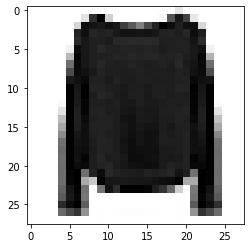

In [25]:
result = model.predict_classes(x_test)
n = 2500
print('the prediction is:', class_names[result[n]])

plt.imshow(x_test[n].reshape(28,28), cmap='Greys')